In [1]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/Lucas Reis/Desktop/Lucas/DataScience/Distrito/Sample - Distrito Dataminer - Sample.csv') 

### Entendimento dos dados

Onde faremos algumas análises de como funcionam os nossos dados, se são dados de categoria ou não, se estão limpos ou não e então faremos a limpeza de alguns e logo entraremos em algumas análises estatísticas

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,ID,Fonte,Response,CNPJ,Startup,Site,LinkedIn,Setor,Público,Categoria,Subcategoria,Funcionários LKD,Ano de fundação,Cidade,Estado,Funding total,Razão Social,Nome LKD,Tags,País,Modelo de negócio,Descrição,Seguidores LKD,Porte LKD,Faixa # de funcionários,Logo LKD,Foto de capa,Crunchbase,Instagram,Facebook,Twitter,Faturamento Presumido,Probabilidade de funcionamento,Data de abertura,Porte,Segmento CNPJ,Natureza Jurídica,Número de sócios,Estágio da operação,Constituição Legal,E-mail,Telefone,Endereço,Founders
0,526,Sebrae,200,01.119.622/0001-04,DriveOn,http://driveonauto.com,http://linkedin.com/company/driveon-telematica,InsurTech,B2B,"Big Data & Analytics,",NaN,3.0,2017.0,Florianópolis,SC,NaN,DISCOVER TECHNOLOGY INFORMATICA LIMITADA,Driveon Telemática,"Telemática,IoT,Big Data,Deep Learning,Automóve...",BR,SaaS,Driveon é a plataforma perfeita para os servi...,94.0,1 - 10,2 - 10,https://media.licdn.com/dms/image/C560BAQE_Ec-...,https://media.licdn.com/dms/image/C561BAQEbC6E...,https://www.crunchbase.com/organization/driveon,NaN,http://facebook.com/driveontelematica,NaN,De R$10.000.001 a R$25.000.000,ALTA,1996-03-19,Media,SERVICOS,SOCIEDADE EMPRESARIA LIMITADA,2.0,Operando,LTDA,"contato@driveonauto.com,yumi.hamada@discover.c...",NaN,"SC-401, Km 04, s/n - Saco Grande, Florianópoli...","Expedito Fernandes Belmont,Marcio dos Santos P..."
1,372,Report,200,28.167.791/0001-68,Code Money,http://codemoney.com.br,http://linkedin.com/company/code-money,"RetailTech,FinTech",B2B,"Pagamentos,Meios de Pagamento,",Scan & Go | Carteira Digital | Gateway | Antif...,16.0,2017.0,Florianópolis,SC,650,CODE MONEY TECNOLOGIA LTDA,Code Money,Finanças,BR,Marketplace,Soluções financeiras de pagamento e recebiment...,263.0,1 - 10,11 - 50,https://media.licdn.com/dms/image/C560BAQETPhD...,https://media.licdn.com/dms/image/C561BAQHYpEO...,https://www.crunchbase.com/organization/code-m...,http://instagram.com/code.money,http://facebook.com/use,NaN,De R$1.800.001 a R$3.600.000,MÉDIA,2017-07-12,Pequena,SERVICOS,SOCIEDADE EMPRESARIA LIMITADA,2.0,Operação,LTDA,"quero@codemoney.com.br.,hello@codemoney.com.br...",NaN,"Rod. José Carlos Daux, João Paulo, nº 1953, Fl...","Júnior Beltrão,Maikew Medeiro,Thuran Crespi,Sa..."
2,538,Report,200,22.102.480/0001-34,E-moving,http://e-moving.com.br,http://linkedin.com/company/e-moving-mobilidad...,Água e Energia,B2B2C,Mobilidade Elétrica,NaN,25.0,2015.0,São Paulo,SP,NaN,"E-MOVING MOBILIDADE URBANA, INDUSTRIA E COMERC...",E-Moving | Mobilidade Sustentável,"Mobilidade Urbana,Transportes,Saúde e bem-esta...",BR,Marketplace,A E-Moving tem como missão revolucionar a form...,1640.0,1 - 10,11 - 50,https://media.licdn.com/dms/image/C4D0BAQEX7q_...,https://media.licdn.com/dms/image/C4E1BAQGpNqW...,NaN,http://instagram.com/emoving,http://facebook.com/emovingbr,NaN,De R$260.001 a R$360.000,ALTA,2015-03-23,Micro,INDUSTRIA,SOCIEDADE EMPRESARIA LIMITADA,2.0,Escalando/Crescendo,LTDA,"ola@e-moving.com.br,contato@e-moving.com.br,ga...",NaN,"Rua Santa Justina 569, São Paulo","Gabriel Arcon,Kleber Piedade"
3,1100,Report,200,22.598.618/0001-38,Mont Capital,http://montcapital.com.br,http://linkedin.com/company/mont-capital-gesta...,FinTech,B2C,Investimentos,Ativos Financeiros,10.0,2015.0,São Paulo,SP,NaN,MONT CAPITAL GESTAO E ADMINISTRACAO DE RECURSO...,Mont Capital Asset,"Investimentos,Gestão de Recursos,serviços fina...",BR,NaN,A Mont Capital Asset é uma plataforma multi fa...,514.0,11 - 50,11 - 50,https://media.licdn.com/dms/image/C4E0BAQGqQ9C...,https://media.licdn.com/dms/image/C4D1BAQFl8MM...,http://crunchbase.com/organization/comprovei#/...,http://instagram.com/montcapital,http://facebook.com/montcapital,http://twitter.com/montcapital,De R$1.800.001 a R$3.600.000,MÉDIA,2015-06-08,Pequena,SERVICOS,SOCIEDADE EMPRESARIA LIMITADA,2.0,Operando,LTDA,contabil@davidferrari.com.br,NaN,"Avenida Paulista 1636, São Paulo","Jose Mauro Ferraz Andrade,Anderson Ferreira da..."
4,1237,Report,200,26.246.053/0001-80,Orienteme,http://orienteme.com.br,http://linkedi

Parece que os dados foram importados com sucesso

In [4]:
print(data.columns)
print(data.shape)

Index(['ID', 'Fonte', 'Response', 'CNPJ', 'Startup', 'Site', 'LinkedIn',
       'Setor', 'Público', 'Categoria', 'Subcategoria', 'Funcionários LKD',
       'Ano de fundação', 'Cidade', 'Estado', 'Funding total', 'Razão Social',
       'Nome LKD', 'Tags', 'País', 'Modelo de negócio', 'Descrição',
       'Seguidores LKD', 'Porte LKD', 'Faixa # de funcionários', 'Logo LKD',
       'Foto de capa', 'Crunchbase', 'Instagram', 'Facebook', 'Twitter',
       'Faturamento Presumido', 'Probabilidade de funcionamento',
       'Data de abertura', 'Porte', 'Segmento CNPJ', 'Natureza Jurídica',
       'Número de sócios', 'Estágio da operação', 'Constituição Legal',
       'E-mail', 'Telefone', 'Endereço', 'Founders'],
      dtype='object')
(1000, 44)


#### Informações sobre o tipo e o número de dados que temos por coluna

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
ID                                1000 non-null int64
Fonte                             1000 non-null object
Response                          1000 non-null object
CNPJ                              994 non-null object
Startup                           1000 non-null object
Site                              1000 non-null object
LinkedIn                          999 non-null object
Setor                             1000 non-null object
Público                           954 non-null object
Categoria                         948 non-null object
Subcategoria                      810 non-null object
Funcionários LKD                  997 non-null float64
Ano de fundação                   999 non-null float64
Cidade                            993 non-null object
Estado                            996 non-null object
Funding total                     281 non-null object
Razão Social           

In [6]:
data.describe()

,ID,Funcionários LKD,Ano de fundação,Seguidores LKD,Número de sócios
count,1000.000000,997.000000,999.000000,9.980000e+02,983.000000
mean,2030.671000,48.042126,2013.201201,2.568811e+04,2.824008
std,2621.249035,176.345983,4.698586,6.594230e+05,1.865802
min,5.000000,1.000000,1980.000000,1.000000e+00,0.000000
25%,618.750000,5.000000,2012.000000,8.325000e+01,2.000000
50%,1258.500000,13.000000,2015.000000,3.020000e+02,2.000000
75%,1964.250000,33.000000,2016.000000,1.157500e+03,4.000000
max,12061.000000,3329.000000,2019.000000,2.078408e+07,16.000000


Vemos que 75% das nossas empresas tem até 33 funcionários, mas temos empresas que tem até 3.329 funcionários, também a explicação do nosso desvio padrão estar tão grande e nossa média ser maior que 75% das nossas empresas

In [7]:
data.loc[data['Funcionários LKD'] > 1000]

,ID,Fonte,Response,CNPJ,Startup,Site,LinkedIn,Setor,Público,Categoria,Subcategoria,Funcionários LKD,Ano de fundação,Cidade,Estado,Funding total,Razão Social,Nome LKD,Tags,País,Modelo de negócio,Descrição,Seguidores LKD,Porte LKD,Faixa # de funcionários,Logo LKD,Foto de capa,Crunchbase,Instagram,Facebook,Twitter,Faturamento Presumido,Probabilidade de funcionamento,Data de abertura,Porte,Segmento CNPJ,Natureza Jurídica,Número de sócios,Estágio da operação,Constituição Legal,E-mail,Telefone,Endereço,Founders
137,1607,Report,200,16.501.555/0001-57,Stone,http://stone.com.br,http://linkedin.com/company/stone-pagamentos,FinTech,B2B,Meios de Pagamento,PdV,3329.0,2012.0,São Paulo,SP,NaN,STONE PAGAMENTOS S.A.,Stone Pagamentos,"Tecnologia,Pagamentos,Finanças",BR,Outros,Muito mais que uma maquininha no balcão.\n\nNó...,24.0,1001 - 5000,1001 - 5000,https://media.licdn.com/dms/image/C4E0BAQH4L-U...,https://media.licdn.com/dms/image/C4E1BAQF29Qf...,https://www.crunchbase.com/organization/stone-...,http://instagram.com/stonepagamentos,http://facebook.com/stonepagamentos,http://twitter.com/stonepagamentos,Acima de R$100.000.000,ALTA,2012-06-22,Grande,SERVICOS,SOCIEDADE ANONIMA FECHADA,7.0,Operando,NaN,sbolfer@arpexcapital.com.br,NaN,"Rua Fidêncio Ramos, 308 - Vila Olímpia - 10º A...",NaN
219,1176,Report,200,18.236.120/0001-58,Nubank,http://nubank.com.br,http://linkedin.com/company/nubank-brasil,FinTech,B2C,Serviços Digitais,Bancos Digitais,1524.0,2013.0,São Paulo,SP,"728,300,000",NU PAGAMENTOS S.A.,Nubank,"Payments,Lending and Investments,Finanças,Fina...",BR,NaN,Nubank is the leading fintech in Latin America...,1023217.0,1001 - 5000,1001 - 5000,https://media.licdn.com/dms/image/C4D0BAQFgkED...,https://media.licdn.com/dms/image/C4E1BAQFS6nw...,https://www.crunchbase.com/organization/nubank,http://instagram.com/nubank,http://facebook.com/nubankbrasil,http://twitter.com/nubank,Acima de R$100.000.000,ALTA,2013-06-04,Grande,SERVICOS,SOCIEDADE ANONIMA FECHADA,9.0,Operando,NaN,"nucommunity@x.jpg,nucommunity@1x.jpg,meajuda@n...",NaN,"Rua Capote Valente, São Paulo, São Paulo","Cristina Junqueira, David Velez, Edward Wible"
325,1263,Report,200,08.561.701/0001-01,PagSeguro,http://pagseguro.uol.com.br,http://linkedin.com/company/pagseguro-uol,FinTech,B2B,Meios de Pagamento,PdV,1636.0,2006.0,São Paulo,SP,NaN,PAGSEGURO INTERNET S.A.,PagSeguro UOL,"Commerce and Shopping,Financial Services,Inter...",BR,NaN,O PagSeguro promove soluções inovadoras em ser...,927370.0,501 - 1000,501 - 1000,https://media.licdn.com/dms/image/C4E0BAQFV8aI...,https://media.licdn.com/dms/image/C4D1BAQHo_D1...,https://www.crunchbase.com/organization/pagseguro,http://instagram.com/pagseguro,http://facebook.com/pagseguro,NaN,Acima de R$100.000.000,ALTA,2006-12-20,Grande,SERVICOS,SOCIEDADE ANONIMA FECHADA,4.0,NaN,NaN,faleconosco@uol.com.br,NaN,"Avenida Brigadeiro Faria Lima, nº 1384, , São ...",NaN
352,2042,DV- AdTech,200,08.654.191/0001-17,Movile,http://movile.com,http://linkedin.com/company/391532,AdTech,"B2B,B2C",Content & Experience,E-mail & SMS Marketing,2938.0,1998.0,Campinas,SP,"355,000,000",MOVILE INTERNET MOVEL S.A.,Movile,"Mobile,Web,Apple,Android,Aplicativos,E-commerce",BR,Outros,A Movile é líder global em mobile marketplaces...,87988.0,1001 - 5000,1001 - 5000,https://media.licdn.com/dms/image/C510BAQFq2nq...,https://media.licdn.com/dms/image/C4E1BAQEx1Gr...,NaN,NaN,http://facebook.com/movile,NaN,Acima de R$100.000.000,ALTA,2007-02-12,Grande,SERVICOS,SOCIEDADE ANONIMA FECHADA,6.0,Operando,NaN,"compras1@movile.com,financeiro@movile.com",NaN,"Av. Coronel Silva Teles, 977 5º andar, Cambuí...",NaN


#### Mais entendimentos sobres os dados

In [8]:
data['Fonte'].unique()

array(['Sebrae', 'Report', 'Report Antigo', 'Base Compilada', '.',
       'Crunchbase', 'Cadastro-Dataminer', 'Liga Ventures', 'StartupBase',
       'Report Retailtech', 'Abstartups', 'Cadastro Dataminer',
       'Report AgTech', 'Extra', 'Disruptbox', 'Cadastro DM',
       'DV- AdTech', 'Portfólio Aceleradoras/Investidoras',
       'Report Healthtech', 'Report Enel,Report Indústria 4.0', 'DV',
       'Report Fintech', 'LinkedIn', 'Report Indústria 4.0',
       'DV- HealthTech', 'Distrito', 'Base Distrito', 'Report Enel'],
      dtype=object)

In [9]:
data['Categoria'].value_counts()

Crédito                                                                  52
Meios de Pagamento                                                       48
,Advertising & Promotion                                                 34
Backoffice                                                               31
,Commerce & Sales                                                        24
Advertising & Promotion                                                  24
Criptomoedas                                                             22
,Content & Experience                                                    21
Social & Relationships                                                   20
Investimentos                                                            17
Risco e Compliance                                                       17
Content & Experience                                                     16
Serviços Digitais                                                        15
Finanças Pes

Podemos  ver que acima temos dados com ',' na frente e no final de frases, faremos a limpeza para vermos as mudanças, pois empresas de Advertising & Promotion tem na soma maior o que deveria colocar ela em primeiro lugar no rank de quantidade.

In [10]:
data['Categoria'] = data['Categoria'].str.replace(",","").astype(object)
data['Categoria'].value_counts()

Advertising & Promotion                                                                              62
Meios de Pagamento                                                                                   60
Crédito                                                                                              55
Content & Experience                                                                                 46
Social & Relationships                                                                               44
Backoffice                                                                                           38
Commerce & Sales                                                                                     35
Gestão e PEP                                                                                         30
Criptomoedas                                                                                         23
Risco e Compliance                                              

Poderiamos separar as categorias de empresas que tem mais de uma categoria, mas para isso duplicaremos nossos dados e não gostariamos de fazer isso agora

In [11]:
data['Setor'] = data['Setor'].str.replace(",","").astype(object)
data['Setor'].value_counts()

FinTech                                        294
AdTech                                         139
HealthTech                                     104
RetailTechAdTech                                62
RetailTech                                      44
AgTech                                          32
LegalTech                                       29
Indústria 4.0                                   26
Água e Energia                                  21
RetailTechFinTech                               16
AgTechIndústria 4.0                             14
Saúde e Bem-estarHealthTech                     14
InsurTech                                       13
Vendas e MarketingAdTech                        12
FinTechRetailTech                               10
FinTechAdTech                                    9
EdTech                                           8
FinTechLegalTech                                 7
Água e EnergiaIndústria 4.0                      7
AdvertisingAdTech              

In [12]:
data['Funding total'].value_counts()

0              90
63,000          6
50,000          6
1,000,000       2
30,672          2
130,000         2
1,300,000       2
1,012,889       2
1,500,000       2
66,943          2
2,292,520       1
352,615         1
1,017,436       1
6,398,475       1
260,000         1
56,200,000      1
30,000,000      1
525,000         1
30,175          1
644,812         1
739,718         1
800,000         1
31,627          1
31,946          1
100,000         1
88,059          1
1,634,809       1
61,000,000      1
99,971          1
285,000         1
               ..
508,380         1
1,181,467       1
83,484          1
2,405,558       1
318,950,000     1
51,693          1
150,600,000     1
10,891,890      1
479,785         1
26,174,212      1
121,241         1
186,702         1
55,431          1
64,327          1
301,887         1
193,954         1
46,087          1
20,000          1
4,708,246       1
476,836         1
425,427         1
692,000         1
946,490         1
8,929,892       1
200,000   

Vemos dados numéricos sendo tratados como objetos, trataremos.

In [13]:
data['Funding total'] = data['Funding total'].str.replace(",","").astype(float)

In [14]:
data['Natureza Jurídica'].value_counts()

SOCIEDADE EMPRESARIA LIMITADA                                               692
SOCIEDADE ANONIMA FECHADA                                                   199
EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA (DE NATUREZA EMPRESÁRIA)     37
EMPRESARIO (INDIVIDUAL)                                                      29
SOCIEDADE SIMPLES LIMITADA                                                   19
EMPRESA DOMICILIADA NO EXTERIOR                                               4
OUTRAS FORMAS DE ASSOCIACAO                                                   2
SOCIEDADE SIMPLES PURA                                                        2
SOCIEDADE EM CONTA DE PARTICIPACAO                                            1
SOCIEDADE ANONIMA ABERTA                                                      1
CLUBE/FUNDO DE INVESTIMENTO                                                   1
Name: Natureza Jurídica, dtype: int64

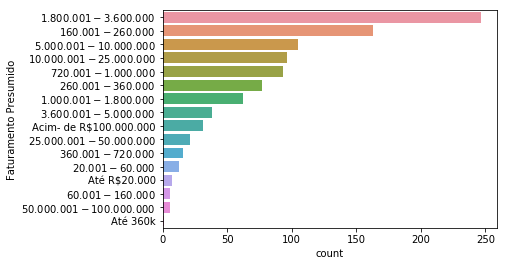

In [20]:
# Foram feitas limpezas para melhor leitura
data['Faturamento Presumido'] = data['Faturamento Presumido'].str.replace("De R","")
data['Faturamento Presumido'] = data['Faturamento Presumido'].str.replace("a R","-")
ax = sns.countplot(y='Faturamento Presumido', data=data, order = data['Faturamento Presumido'].value_counts().index)

In [21]:
data['Porte LKD'].value_counts()

11 - 50        379
1 - 10         227
2 - 10         205
51 - 200       111
201 - 500       15
501 - 1000       5
1001 - 5000      4
0 - 1            2
51-200           1
11-50            1
51 - 100         1
Name: Porte LKD, dtype: int64

#### Boxplot

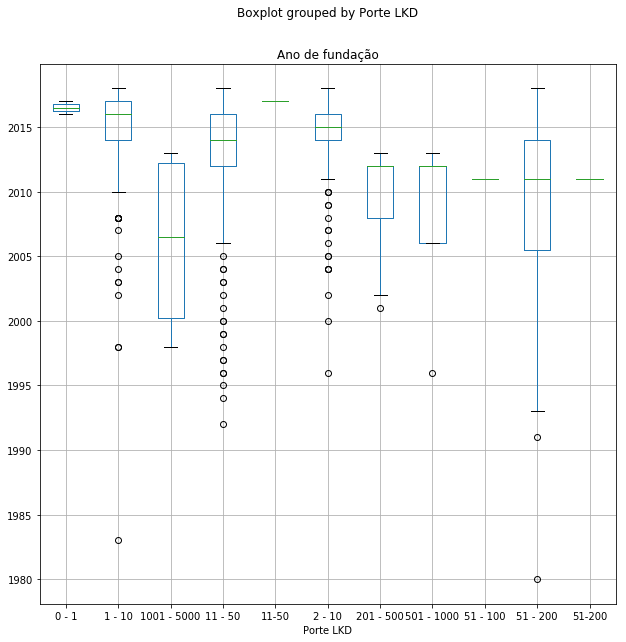

In [22]:
data.boxplot('Ano de fundação','Porte LKD',figsize = (10,10))

Histograma sobre ano de fundação

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1B1FD0D0>]],
      dtype=object)

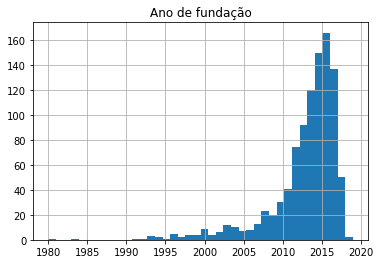

In [30]:
data.hist('Ano de fundação',bins = 40)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
ID                                1000 non-null int64
Fonte                             1000 non-null object
Response                          1000 non-null object
CNPJ                              994 non-null object
Startup                           1000 non-null object
Site                              1000 non-null object
LinkedIn                          999 non-null object
Setor                             1000 non-null object
Público                           954 non-null object
Categoria                         948 non-null object
Subcategoria                      810 non-null object
Funcionários LKD                  997 non-null float64
Ano de fundação                   999 non-null float64
Cidade                            993 non-null object
Estado                            996 non-null object
Funding total                     281 non-null float64
Razão Social          

In [66]:
corr = data.corr()

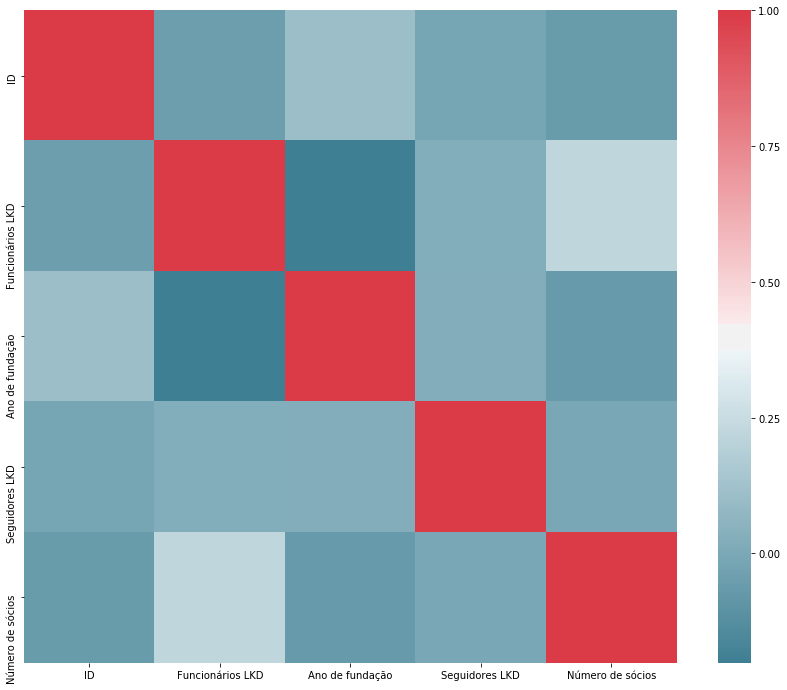

In [73]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [35]:
data['Cidade'].value_counts()

São Paulo                384
Curitiba                  87
Rio de Janeiro            65
Belo Horizonte            52
Porto Alegre              48
Florianópolis             45
Campinas                  17
Joinville                 15
São José dos Campos       13
Barueri                   13
Uberlândia                12
Ribeirão Preto            10
São Leopoldo               9
Goiânia                    9
Londrina                   7
Vitória                    7
Blumenau                   7
Fortaleza                  6
Sorocaba                   6
Juiz de Fora               6
Brasília                   6
Maringá                    5
Chapecó                    5
São Carlos                 4
Recife                     4
Niterói                    4
Uberaba                    4
Cascavel                   4
Piracicaba                 3
Palhoça                    3
                        ... 
Formiga                    1
Conchal                    1
Rio do Sul                 1
Jacarezinho   

In [17]:
data.loc[data['CNPJ'] == '16.501.555/0001-57']

,ID,Fonte,Response,CNPJ,Startup,Site,LinkedIn,Setor,Público,Categoria,...,Porte,Segmento CNPJ,Natureza Jurídica,Número de sócios,Estágio da operação,Constituição Legal,E-mail,Telefone,Endereço,Founders
126,1254,Report,200,16.501.555/0001-57,Pagar.me,http://pagar.me,http://linkedin.com/company/pagar-me,"RetailTech,FinTech",B2B,"Pagamentos,Meios de Pagamento",...,Grande,SERVICOS,SOCIEDADE ANONIMA FECHADA,7.0,Operando,NaN,sbolfer@arpexcapital.com.br,NaN,"Rua Fidêncio Ramos, 308, 10º andar - Vila Olím...","Henrique Dubugras, Pedro Franceschi"
137,1607,Report,200,16.501.555/0001-57,Stone,http://stone.com.br,http://linkedin.com/company/stone-pagamentos,FinTech,B2B,Meios de Pagamento,...,Grande,SERVICOS,SOCIEDADE ANONIMA FECHADA,7.0,Operando,NaN,sbolfer@arpexcapital.com.br,NaN,"Rua Fidêncio Ramos, 308 - Vila Olímpia - 10º A...",NaN


In [32]:
gdata = pd.read_csv('C:/Users/Lucas Reis/PycharmProjects/Scrapy2/glass.csv') 

In [33]:
gdata.head()

,empresa,nota,avaliacoes
0,Itaú Unibanco (Itaú BBA e Rede),"4,2","7,7k"
1,IBM,"3,9",50k
2,Banco Bradesco,"3,8","4,3k"
3,Atento,"3,3","3,9k"
4,Santander,"3,7","6,3k"


ValueError: num must be 1 <= num <= 0, not 1

<Figure size 432x288 with 0 Axes>